In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [25]:
class CustomLogisticRegression:
    
    def __init__(self, lr=0.1, max_iters=20):
        self.lr=lr
        self.max_iters=max_iters
    
    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.theta_ = np.random.randn(X.shape[1], 1)
        
        for _ in range(self.max_iters):
            self.gradient_accend(X, y)
        self.intercept_ = self.theta_[0]
        self.coef_ = self.theta_[1:] 
    def gradient_accend(self,X,y):
        delta_theta = self.gradient(X,y)
        self.theta_+= delta_theta
    def gradient(self, X, y):
        yh = self.sigmoid(X)
        ya = y.reshape(-1,1)
        diff = (yh-ya)
        delta = np.dot(X.T, diff)/len(X)
        return -delta*self.lr
    def sigmoid(self, X):
        g = np.dot(X, self.theta_)
        return 1/(1+np.exp(-g))

In [26]:
model = CustomLogisticRegression(max_iters=100)

In [27]:
X, y = make_blobs(centers=2, random_state=42)

In [28]:
X.shape

(100, 2)

In [29]:
y.shape

(100,)

In [30]:
model.fit(X,y)

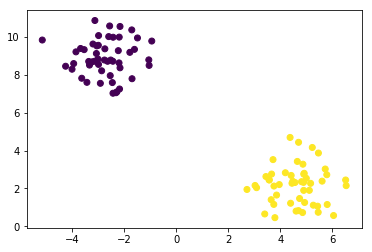

In [13]:
plt.scatter(X[:,0], X[:, 1], c=y)

In [32]:
x1 = np.linspace(-10,10, 50)

m1, m2 = model.coef_
c = model.intercept_
x2 = -(m1*x1)/m2 -c/m2

(-2, 15)

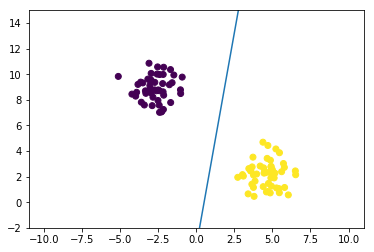

In [33]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x1, x2)
plt.ylim(-2,15)

In [34]:
model.theta_

array([[-0.67671982],
       [ 1.32718788],
       [-0.19908726]])